In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_list = []

for i, filename in enumerate(os.listdir('./results/')):
    
    n_workers = int(filename.split('_')[1])
    n_partitions = int(filename.split('_')[5].split('.')[0])
    msg_rate = int(filename.split('_')[3])
       
    with open('./results/' + filename, 'r') as f:
        df = pd.DataFrame.from_dict(json.load(f))
    
    df['# workers'] = n_workers
    df['n_partitions'] = n_partitions
    df[r'msg rate [$s^{-1}$]'] = msg_rate
    
    df_list.append(df)
    


In [3]:
df = pd.concat(df_list)
df.reset_index(inplace=True)
df

,index,batchId,batchDuration,numInputRows,inputRowsPerSecond,processedRowsPerSecond,# workers,n_partitions,msg rate [$s^{-1}$]
0,0,0,15647,0,0.000000,0.000000,1,1,10000
1,1,1,8345,21000,4199.160168,2516.476932,1,1,10000
2,2,2,6020,80551,9649.137518,13380.564784,1,1,10000
3,3,3,4726,58449,9704.300183,12367.541261,1,1,10000
4,4,4,4106,46000,9729.272420,11203.117389,1,1,10000
...,...,...,...,...,...,...,...,...,...
4681,155,154,3687,4900,980.000000,1328.993762,3,24,500
4682,156,155,3736,5000,1000.000000,1338.329764,3,24,500
4683,157,156,3680,5000,1000.000000,1358.695652,3,24,500
4684,158,157,3570,5000,1000.000000,1400.560224,3,24,500


In [4]:
conditions = [df['n_partitions']/(4*df['# workers']) < 1, 
              df['n_partitions']/(4*df['# workers']) == 1,
              df['n_partitions']/(4*df['# workers']) == 2]

choices = ['1', 'n_cores', '2*n_cores']

df['partitions/cores'] = np.select(conditions, choices)

In [5]:
df_plot = df.query('batchId >= 50 and batchId < 120')
df_plot

,index,batchId,batchDuration,numInputRows,inputRowsPerSecond,processedRowsPerSecond,# workers,n_partitions,msg rate [$s^{-1}$],partitions/cores
50,50,50,2468,48000,9601.920384,19448.946515,1,1,10000,1
51,51,51,2449,48000,9600.000000,19599.836668,1,1,10000,1
52,52,52,2445,49000,9798.040392,20040.899796,1,1,10000,1
53,53,53,2511,48000,9601.920384,19115.890084,1,1,10000,1
54,54,54,2736,49000,9800.000000,17909.356725,1,1,10000,1
...,...,...,...,...,...,...,...,...,...,...
4642,116,115,3930,5000,1000.200040,1272.264631,3,24,500,2*n_cores
4643,117,116,3756,5000,1000.000000,1331.203408,3,24,500,2*n_cores
4644,118,117,3766,4900,980.000000,1301.115242,3,24,500,2*n_cores
4645,119,118,3816,5000,999.800040,1310.272537,3,24,500,2*n_cores


<Figure size 6000x4500 with 0 Axes>

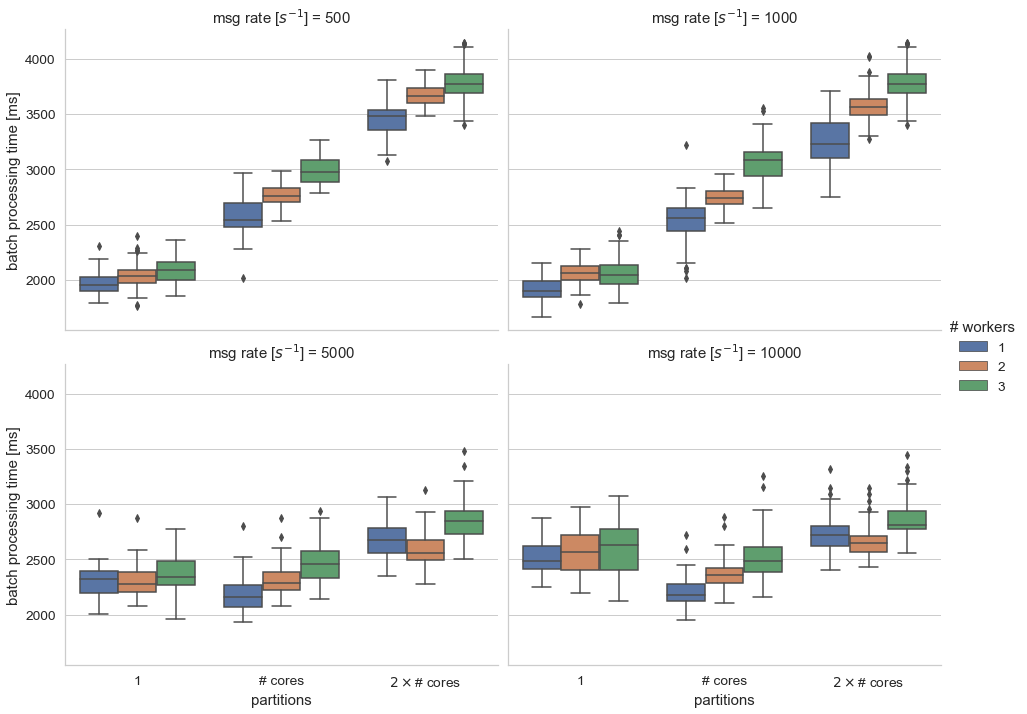

In [6]:
sns.set(font_scale=1.25)
sns.set_style('whitegrid')

fig = plt.figure(figsize=(12, 9), dpi=500)
ax = sns.catplot(x='partitions/cores', y='batchDuration', hue='# workers', col='msg rate [$s^{-1}$]', data=df_plot, col_wrap=2, kind='box', aspect=4/3)
ax.set_xticklabels(['1', '# cores', r'$2\times$# cores'])
ax.set_xlabels('partitions')
ax.set_ylabels('batch processing time [ms]')
ax.savefig('./plots/scaling.pdf')

In [7]:
long_df = pd.read_json('long.json')

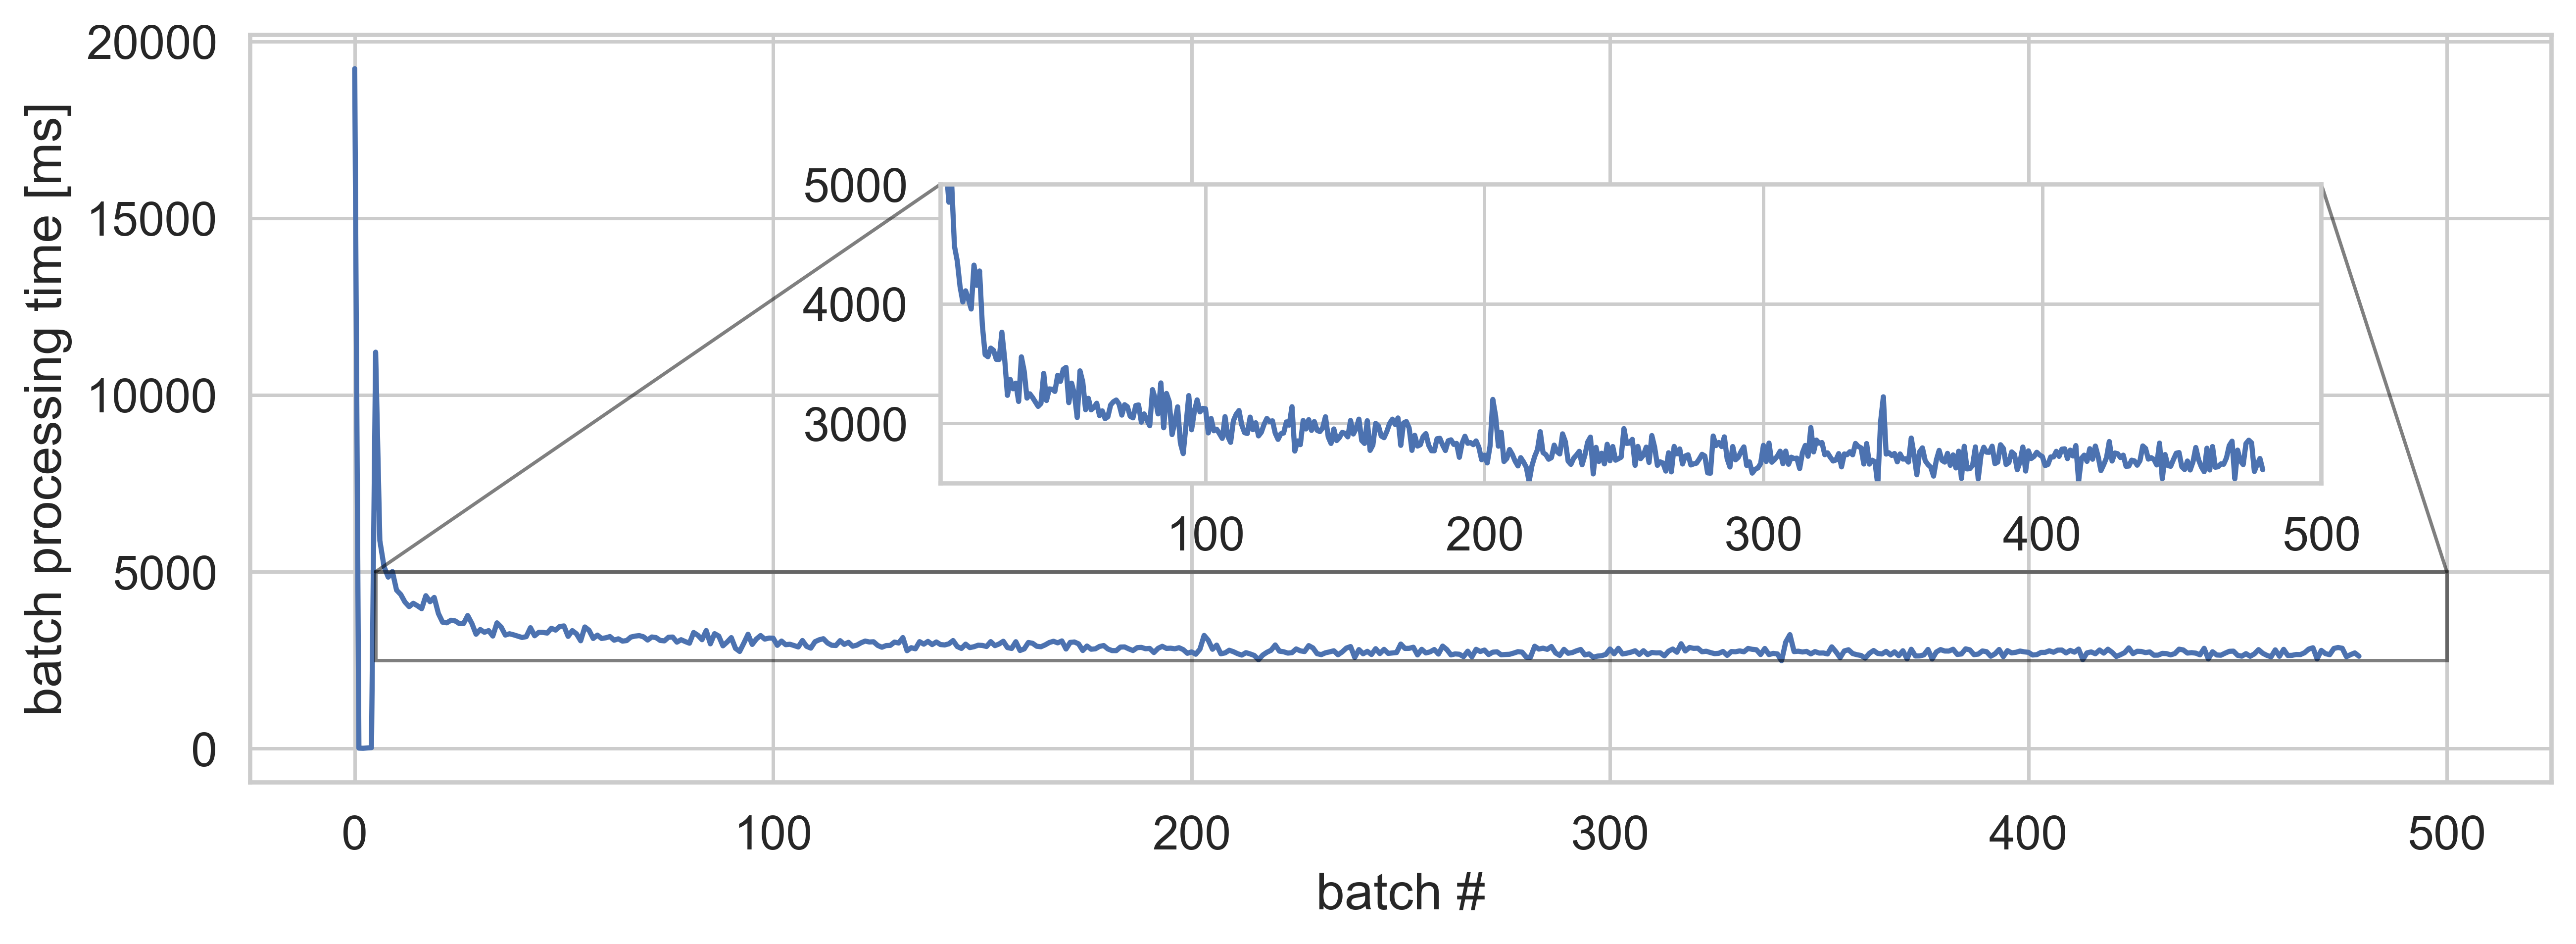

In [8]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

ax.plot(long_df['batchDuration'])

ax_zoom = ax.inset_axes([0.3, 0.4, 0.6, 0.4])
ax_zoom.plot(long_df['batchDuration'])
ax_zoom.set_xlim(5, 500)
ax_zoom.set_ylim(2500, 5000)
ax.indicate_inset_zoom(ax_zoom, edgecolor='black')
ax.set_xlabel('batch #')
ax.set_ylabel('batch processing time [ms]')

fig.savefig('./plots/batch_duration_transient.pdf')


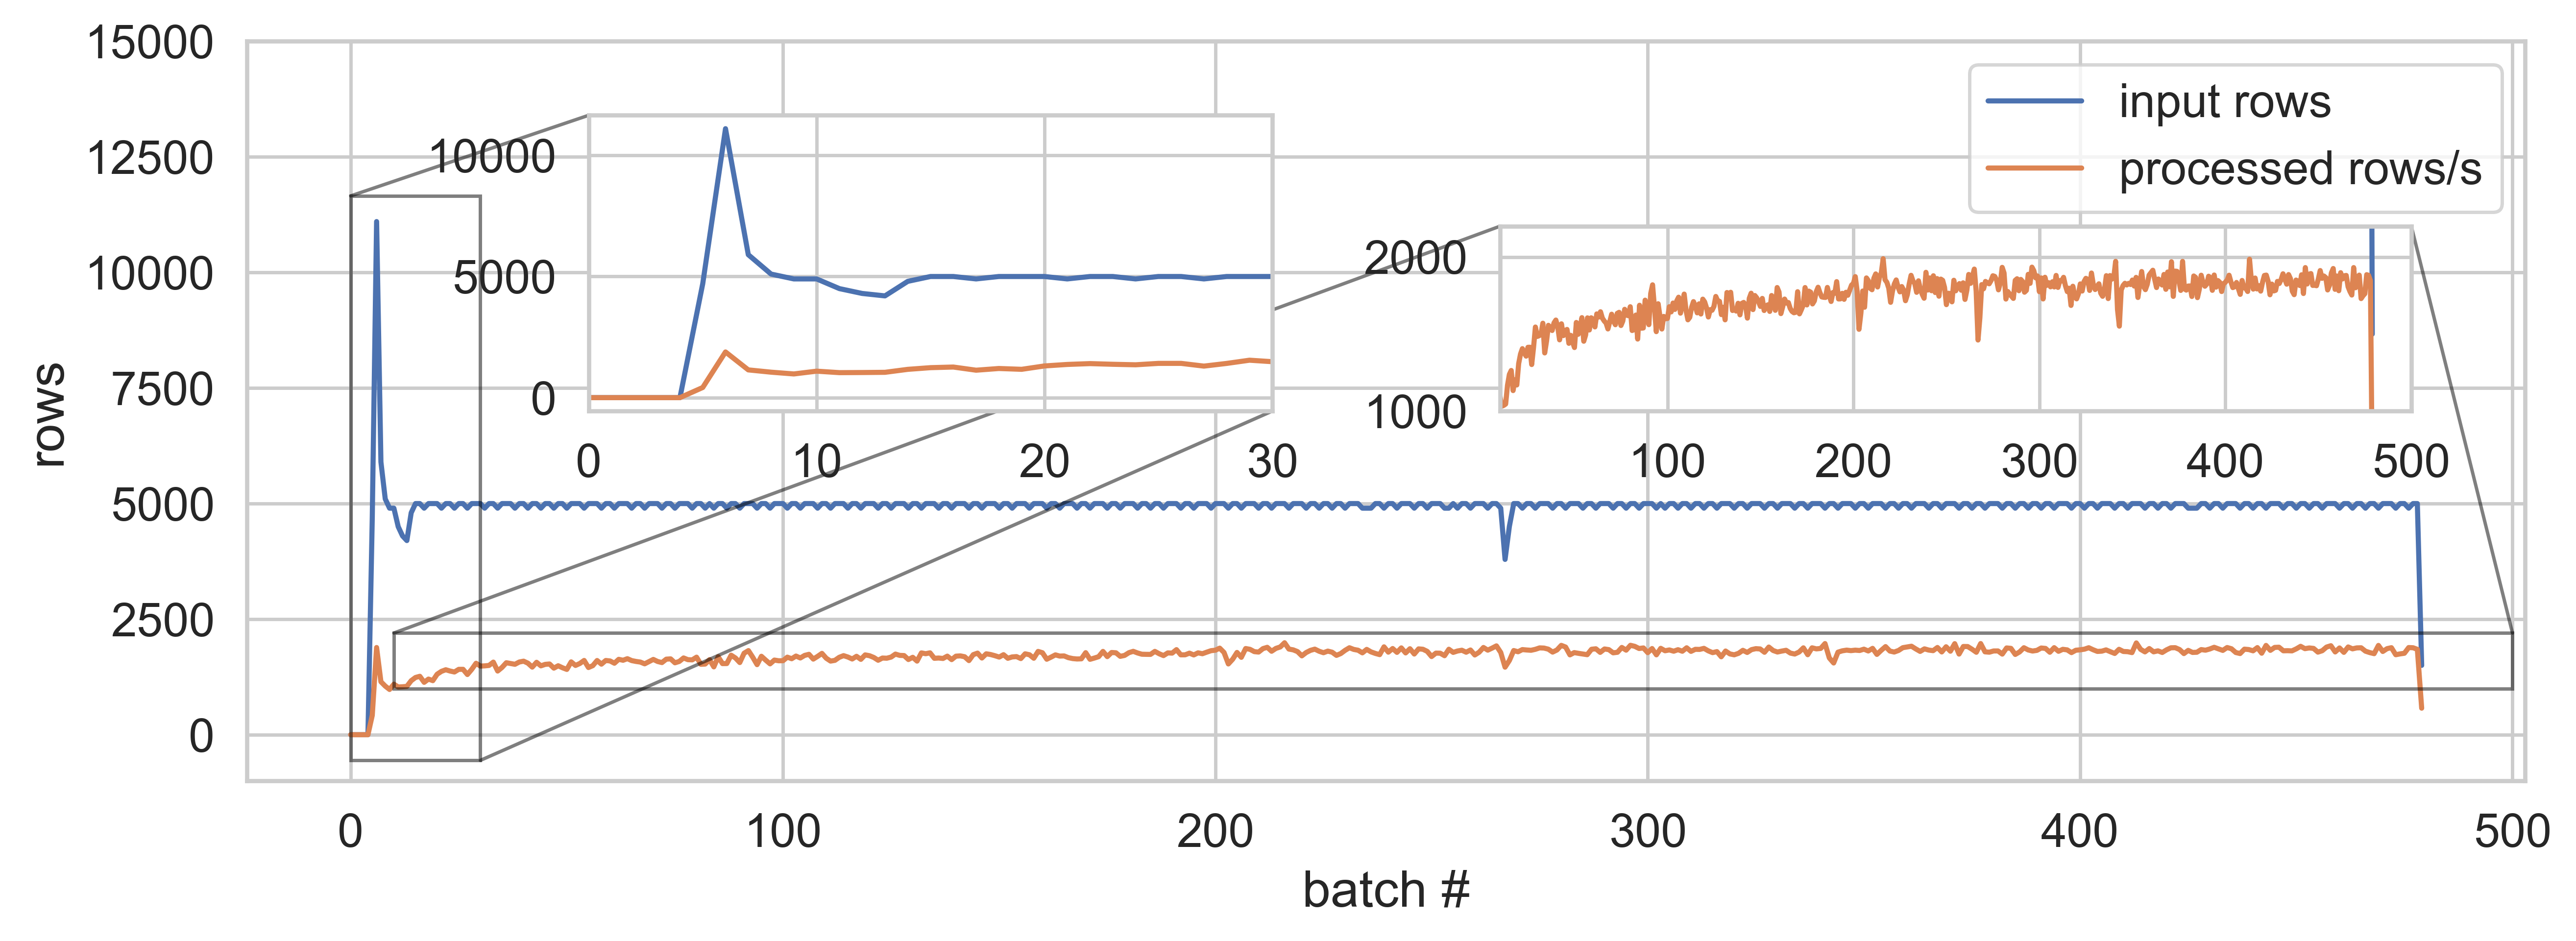

In [9]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

ax.plot(long_df['numInputRows'], label='input rows')
ax.plot(long_df['processedRowsPerSecond'], label='processed rows/s')
ax.legend()
ax.set_xlabel('batch #')
ax.set_ylabel(r'rows')
ax.set_ylim(-1000, 15000)

        

ax_zoom = ax.inset_axes([0.15, 0.5, 0.3, 0.4])
ax_zoom.plot(long_df['numInputRows'])
ax_zoom.plot(long_df['processedRowsPerSecond'])
ax_zoom.set_xlim(0,30)

ax_zoom2 = ax.inset_axes([0.55, 0.5, 0.4, 0.25])
ax_zoom2.plot(long_df['numInputRows'])
ax_zoom2.plot(long_df['processedRowsPerSecond'])
ax_zoom2.set_xlim(10,500)
ax_zoom2.set_ylim(1000,2200)

ax.indicate_inset_zoom(ax_zoom, edgecolor='black')
ax.indicate_inset_zoom(ax_zoom2, edgecolor='black')

fig.savefig('./plots/batch_duration_transient_2.pdf')


In [10]:
df_list = []

for i, filename in enumerate(os.listdir('./time_res/')):
    
    batch_interval = int(filename.split('_')[0])
    
       
    with open('./time_res/' + filename, 'r') as f:
        df = pd.DataFrame.from_dict(json.load(f))
    
    df['batch_interval [s]'] = batch_interval
    
    
    df_list.append(df)

In [11]:
df = pd.concat(df_list)
df.reset_index(inplace=True)
df

,index,batchId,batchDuration,numInputRows,inputRowsPerSecond,processedRowsPerSecond,batch_interval [s]
0,0,0,15237,0,0.000000,0.000000,1
1,1,1,7371,1300,1300.000000,176.366843,1
2,2,2,4409,7400,1003.525902,1678.385121,1
3,3,3,3746,4300,974.835638,1147.891084,1
4,4,4,3199,3800,1013.874066,1187.871210,1
...,...,...,...,...,...,...,...
1771,121,120,1692,5000,999.800040,2955.082742,5
1772,122,121,1936,5000,1000.200040,2582.644628,5
1773,123,122,2051,4900,980.000000,2389.078498,5
1774,124,123,1782,5000,1000.000000,2805.836139,5


In [12]:
df_plot = df.query('batchId >= 50 and batchId < 120')
df_plot

,index,batchId,batchDuration,numInputRows,inputRowsPerSecond,processedRowsPerSecond,batch_interval [s]
50,50,50,1865,1900,997.899160,1018.766756,1
51,51,51,1960,1900,1018.220793,969.387755,1
52,52,52,1875,1900,968.399592,1013.333333,1
53,53,53,1903,1900,1012.253596,998.423542,1
54,54,54,1871,1900,997.375328,1015.499733,1
...,...,...,...,...,...,...,...
1766,116,115,1904,4900,980.000000,2573.529412,5
1767,117,116,1784,5000,1000.000000,2802.690583,5
1768,118,117,1778,5000,1000.000000,2812.148481,5
1769,119,118,1921,5000,999.800040,2602.811036,5


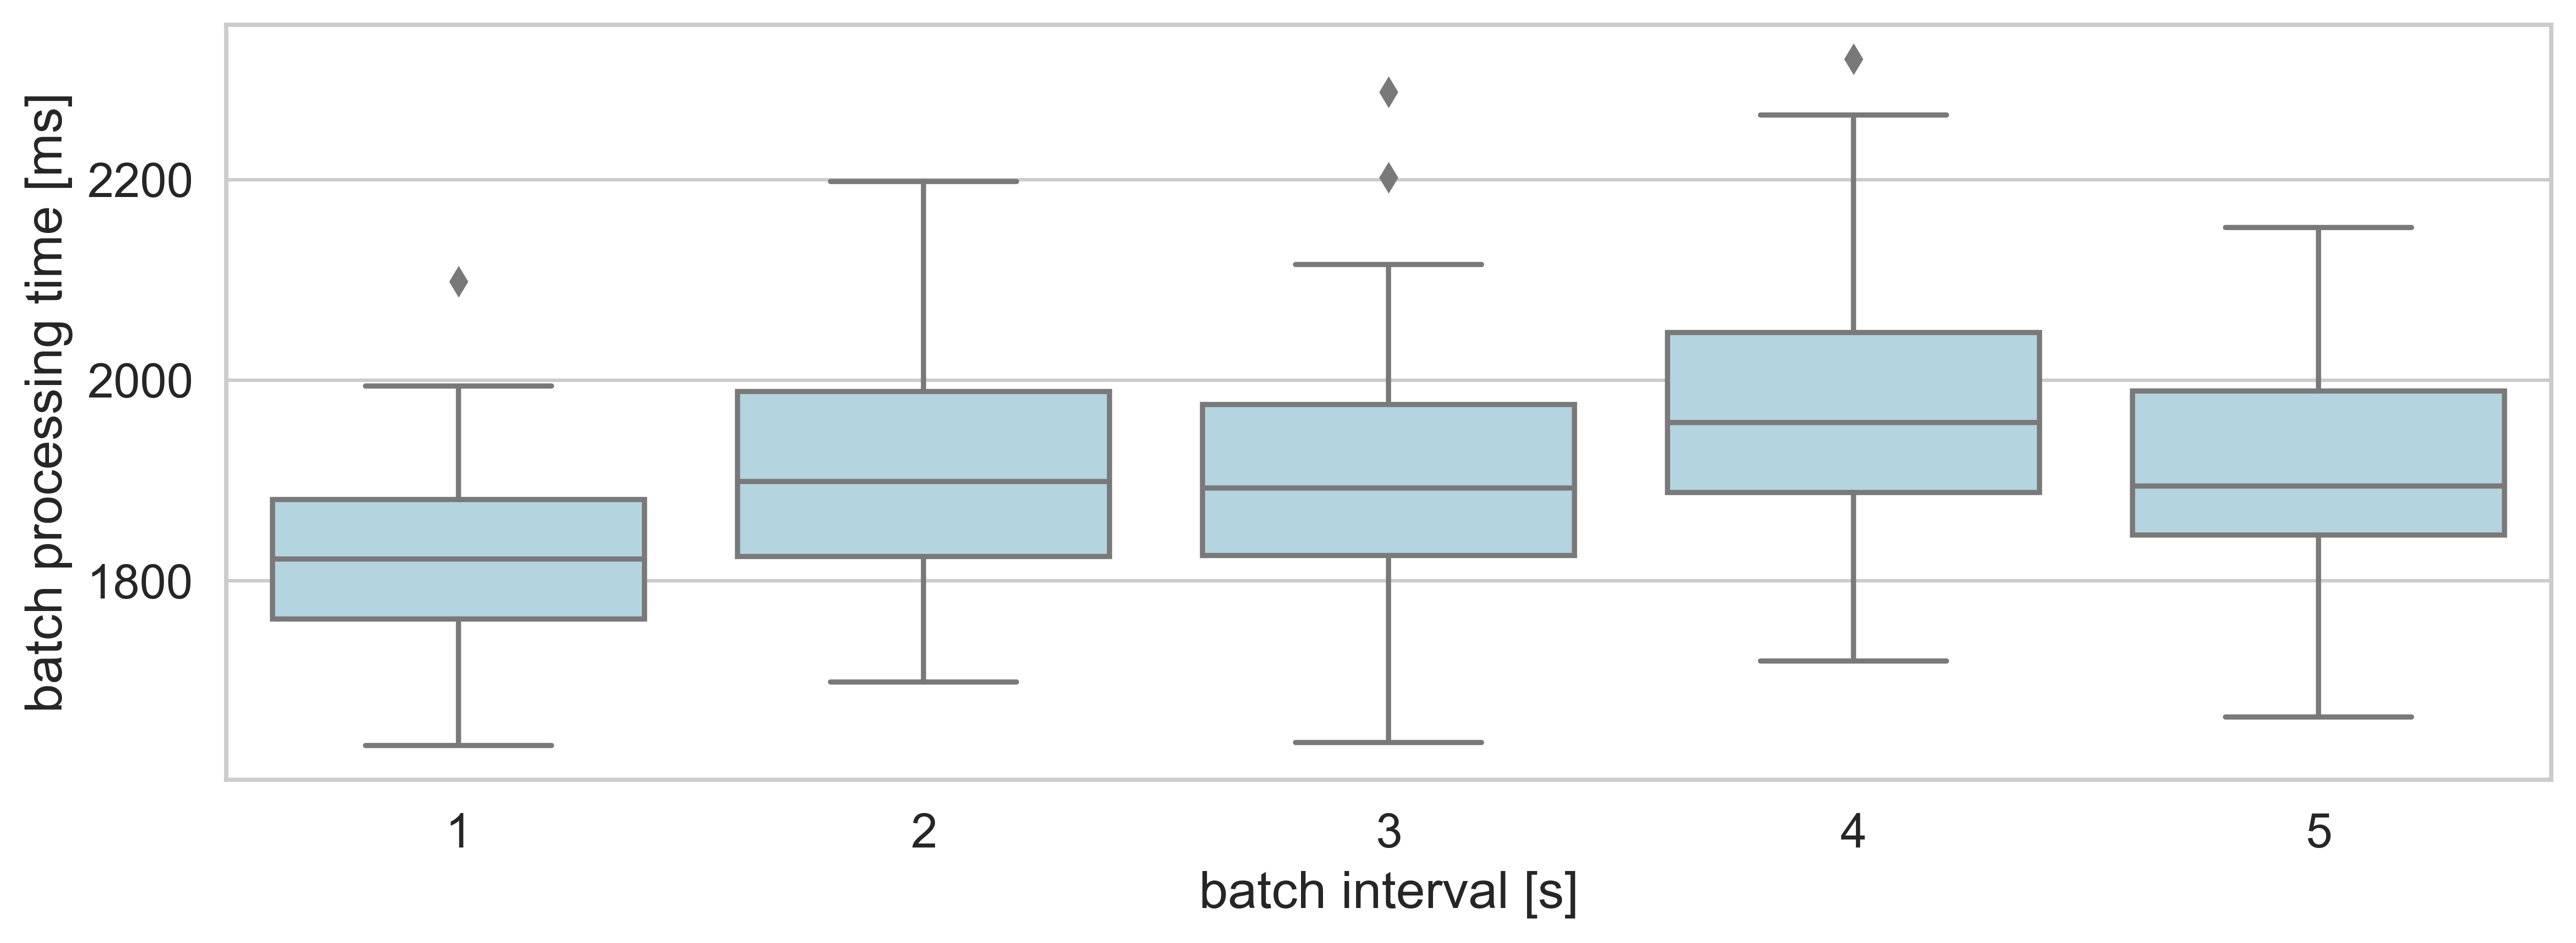

In [13]:
fig = plt.figure(figsize=(12, 4), dpi=500)
ax = sns.boxplot(x='batch_interval [s]', y='batchDuration', data=df_plot, color='lightblue')
ax.set_xlabel('batch interval [s]')
ax.set_ylabel('batch processing time [ms]')

fig.savefig('./plots/batch_dur_int.pdf')

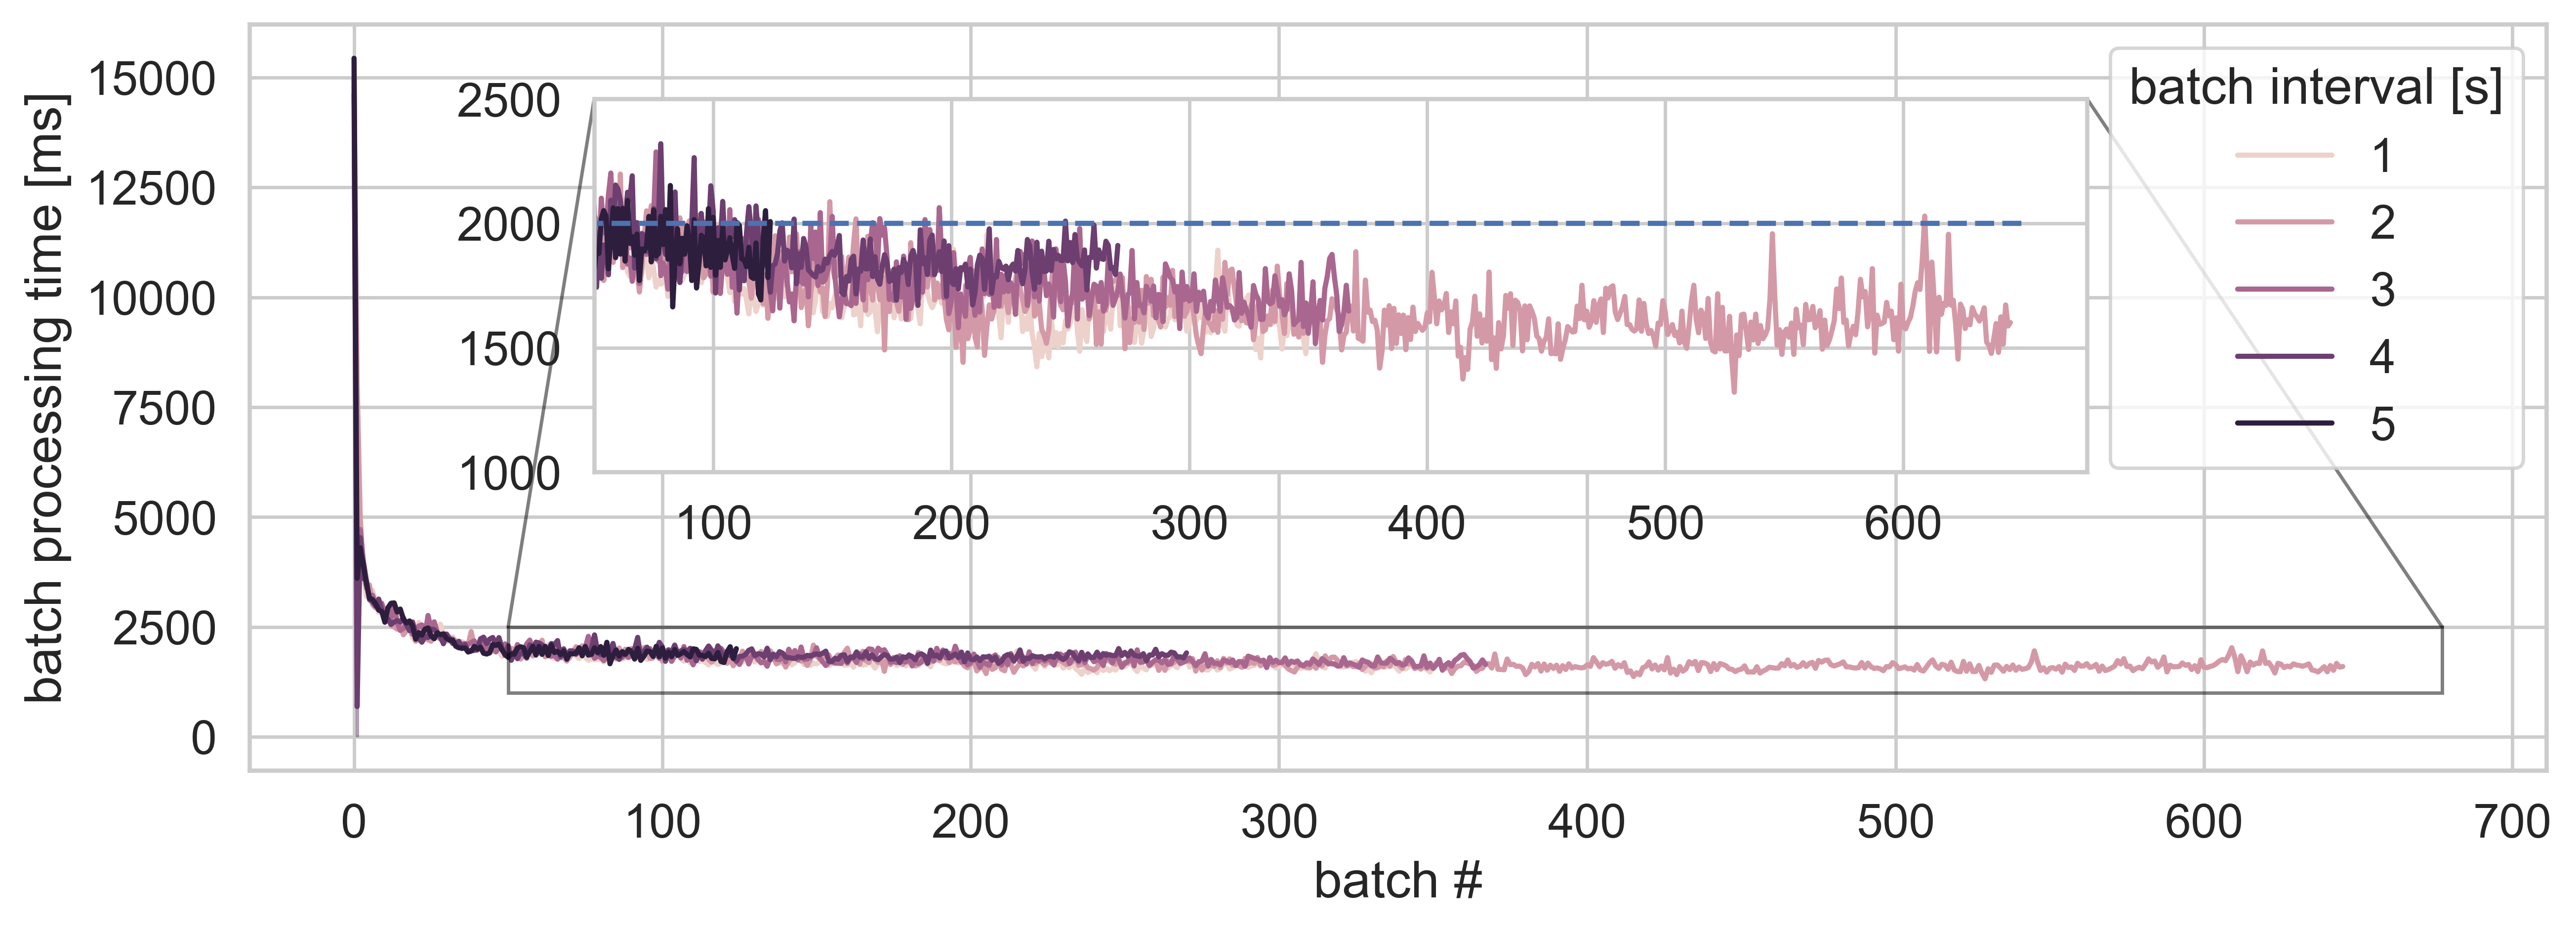

In [14]:
fig, ax = plt.subplots(figsize=(12,4), dpi=500)
sns.lineplot(x='batchId', y='batchDuration', data=df, hue='batch_interval [s]', ax=ax)
ax2 = ax.inset_axes([0.15, 0.4, 0.65, 0.5])
sns.lineplot(x='batchId', y='batchDuration', data=df, hue='batch_interval [s]', ax=ax2, legend=None)

ax.legend(loc='upper right')
ax.legend_.set_title('batch interval [s]')

ax2.set_ylim(1000, 2500)
ax2.set_xlim(50, )
ax2.hlines(2000, 0, 650, linestyles='--')

ax.set_xlabel('batch #')
ax.set_ylabel('batch processing time [ms]')
ax2.set_xlabel('')
ax2.set_ylabel('')

ax.indicate_inset_zoom(ax2, edgecolor='black')

fig.savefig('./plots/batch_ev_int.pdf')